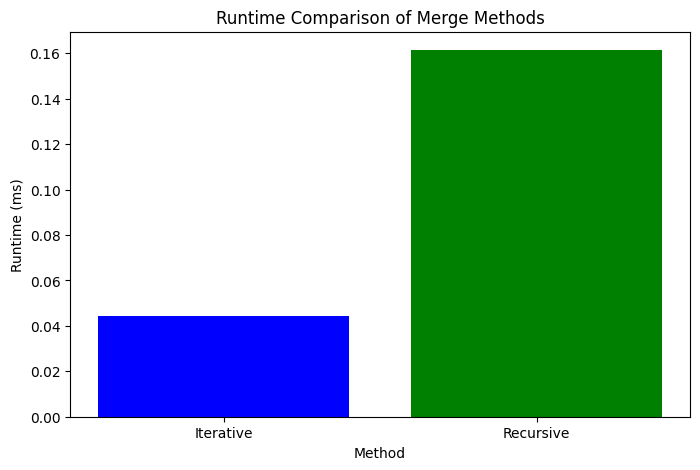

In [7]:
import tkinter as tk
from tkinter import messagebox
import time
import random
import matplotlib.pyplot as plt

def merge_sorted_iterative(arr1, arr2):
    merged = []
    i, j = 0, 0
    while i < len(arr1) and j < len(arr2):
        if arr1[i] < arr2[j]:
            merged.append(arr1[i])
            i += 1
        else:
            merged.append(arr2[j])
            j += 1
    while i < len(arr1):
        merged.append(arr1[i])
        i += 1
    while j < len(arr2):
        merged.append(arr2[j])
        j += 1
    return merged

def merge_sorted_recursive(arr1, arr2):
    if not arr1:
        return arr2
    if not arr2:
        return arr1
    if arr1[0] < arr2[0]:
        return [arr1[0]] + merge_sorted_recursive(arr1[1:], arr2)
    else:
        return [arr2[0]] + merge_sorted_recursive(arr1, arr2[1:])

def process_input():
    try:
        arr1 = list(map(int, entry_arr1.get().strip().split()))
        arr2 = list(map(int, entry_arr2.get().strip().split()))
        arr1.sort()
        arr2.sort()

        # Measure time for iterative method
        start_time = time.time()
        iterative_result = merge_sorted_iterative(arr1, arr2)
        iterative_time = (time.time() - start_time) * 1000  # Convert to milliseconds

        # Measure time for recursive method
        start_time = time.time()
        recursive_result = merge_sorted_recursive(arr1, arr2)
        recursive_time = (time.time() - start_time) * 1000  # Convert to milliseconds

        # Display results
        result_iterative.config(
            text=f"Iterative: {iterative_result} (Time: {iterative_time:.2f} ms)"
        )
        result_recursive.config(
            text=f"Recursive: {recursive_result} (Time: {recursive_time:.2f} ms)"
        )

        # Plot runtime comparison
        plot_runtime(iterative_time, recursive_time)

    except ValueError:
        messagebox.showerror("Invalid Input", "Please enter valid integers separated by spaces.")

def auto_generate_test_case(size1, size2, max_value):
    arr1 = [random.randint(1, max_value) for _ in range(size1)]
    arr2 = [random.randint(1, max_value) for _ in range(size2)]
    entry_arr1.delete(0, tk.END)
    entry_arr1.insert(0, " ".join(map(str, arr1)))
    entry_arr2.delete(0, tk.END)
    entry_arr2.insert(0, " ".join(map(str, arr2)))

def plot_runtime(iterative_time, recursive_time):
    methods = ['Iterative', 'Recursive']
    times = [iterative_time, recursive_time]

    plt.figure(figsize=(8, 5))
    plt.bar(methods, times, color=['blue', 'green'])
    plt.xlabel('Method')
    plt.ylabel('Runtime (ms)')
    plt.title('Runtime Comparison of Merge Methods')
    plt.show()

# Create main application window
root = tk.Tk()
root.title("Merge Sorted Arrays")

# Create a responsive grid layout
root.columnconfigure(0, weight=1)
root.columnconfigure(1, weight=1)

# Input labels and entries
label_arr1 = tk.Label(root, text="Enter Array 1 (space-separated):")
label_arr1.grid(row=0, column=0, sticky="W", padx=10, pady=5)
entry_arr1 = tk.Entry(root, width=50)
entry_arr1.grid(row=0, column=1, padx=10, pady=5, sticky="EW")

label_arr2 = tk.Label(root, text="Enter Array 2 (space-separated):")
label_arr2.grid(row=1, column=0, sticky="W", padx=10, pady=5)
entry_arr2 = tk.Entry(root, width=50)
entry_arr2.grid(row=1, column=1, padx=10, pady=5, sticky="EW")

# Test case generation buttons
test_case_1 = tk.Button(root, text="Test Case 1 (Small)", command=lambda: auto_generate_test_case(3, 3, 10))
test_case_1.grid(row=2, column=0, padx=10, pady=5, sticky="EW")

test_case_2 = tk.Button(root, text="Test Case 2 (Medium)", command=lambda: auto_generate_test_case(5, 5, 50))
test_case_2.grid(row=2, column=1, padx=10, pady=5, sticky="EW")

test_case_3 = tk.Button(root, text="Test Case 3 (Large, 100 Elements)", command=lambda: auto_generate_test_case(50, 50, 100))
test_case_3.grid(row=3, column=0, padx=10, pady=5, sticky="EW")

test_case_4 = tk.Button(root, text="Test Case 4 (Very Large, 200 Elements)", command=lambda: auto_generate_test_case(100, 100, 200))
test_case_4.grid(row=3, column=1, padx=10, pady=5, sticky="EW")

test_case_5 = tk.Button(root, text="Test Case 5 (Huge, 1000 Elements)", command=lambda: auto_generate_test_case(500, 500, 500))
test_case_5.grid(row=4, column=0, padx=10, pady=5, sticky="EW")

# Process button
process_button = tk.Button(root, text="Merge and Sort", command=process_input)
process_button.grid(row=4, column=1, padx=10, pady=5, sticky="EW")

# Results labels
result_iterative = tk.Label(root, text="Iterative: ", fg="blue")
result_iterative.grid(row=5, column=0, columnspan=2, padx=10, pady=5, sticky="W")

result_recursive = tk.Label(root, text="Recursive: ", fg="green")
result_recursive.grid(row=6, column=0, columnspan=2, padx=10, pady=5, sticky="W")

# Run the application
root.mainloop()
